## Group 1 - Project 4: Fetal Health Classification ##

### Background: ###

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Source: [Kaggle](https://www.kaggle.com/andrewmvd/fetal-health-classification?select=fetal_health.csv)

### Problem Statement: ###

We are going to be classifying fetal health into 3 classes. We are trying to understand what indicates normal, suspect, or pathological infant health based on cardiotocogram results, which will help medical professionals take the appropriate action to reduce child mortality rates. There are 9 features and 2126 observations.

### Data Cleaning & EDA ###

In [88]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier



In [5]:
pd.set_option('display.max_columns', 200)

In [6]:
df = pd.read_csv('./fetal_health.csv')

In [7]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


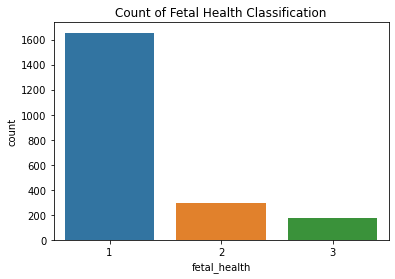

In [93]:
sns.countplot(data= df, x = 'fetal_health');
plt.title('Count of Fetal Health Classification');

In [15]:
df['fetal_health'].value_counts(normalize=True)

1    0.778457
2    0.138758
3    0.082785
Name: fetal_health, dtype: float64

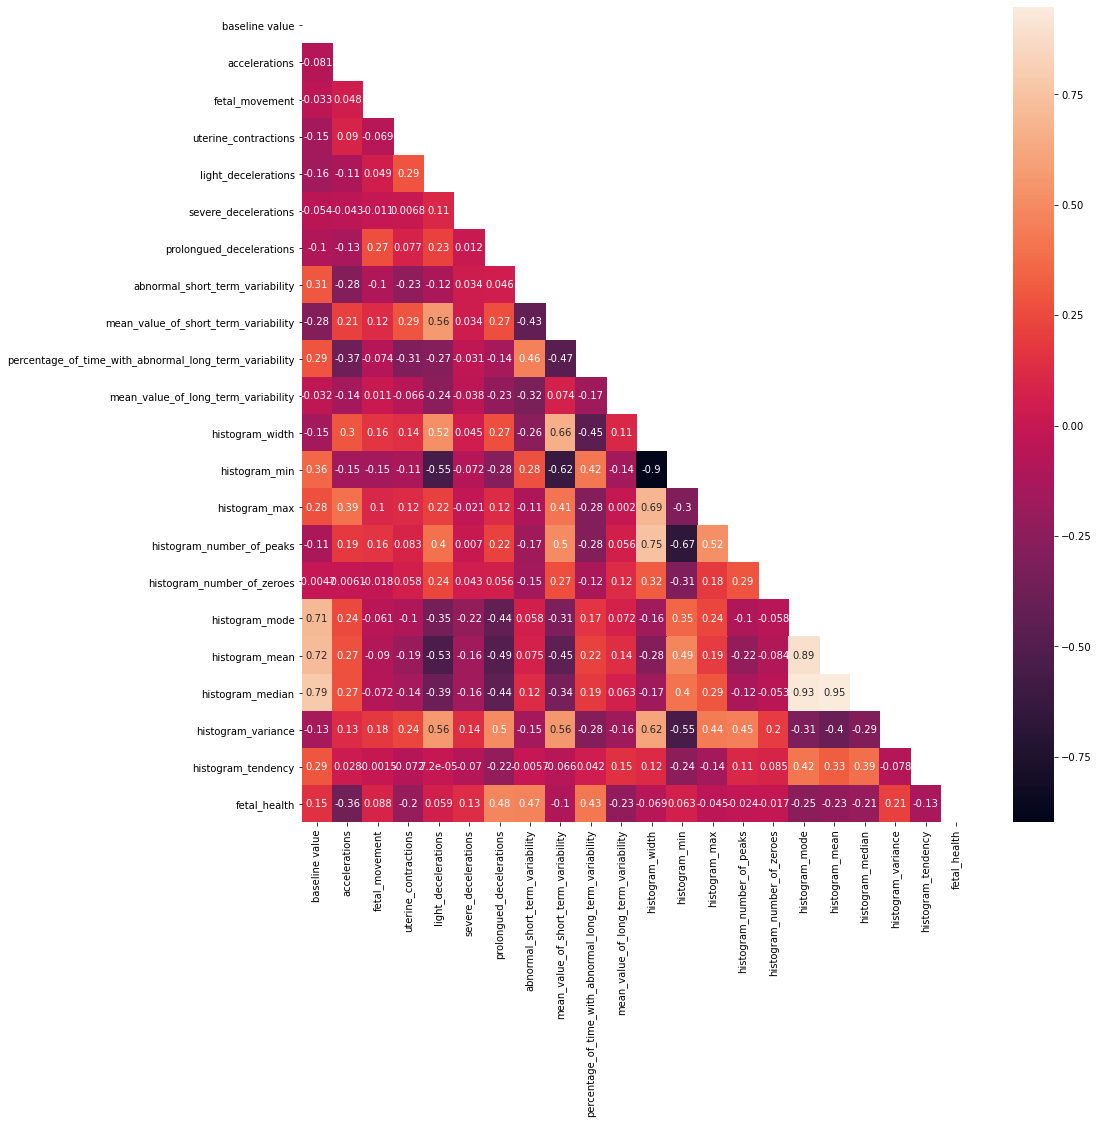

In [22]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, mask=mask);

In [25]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

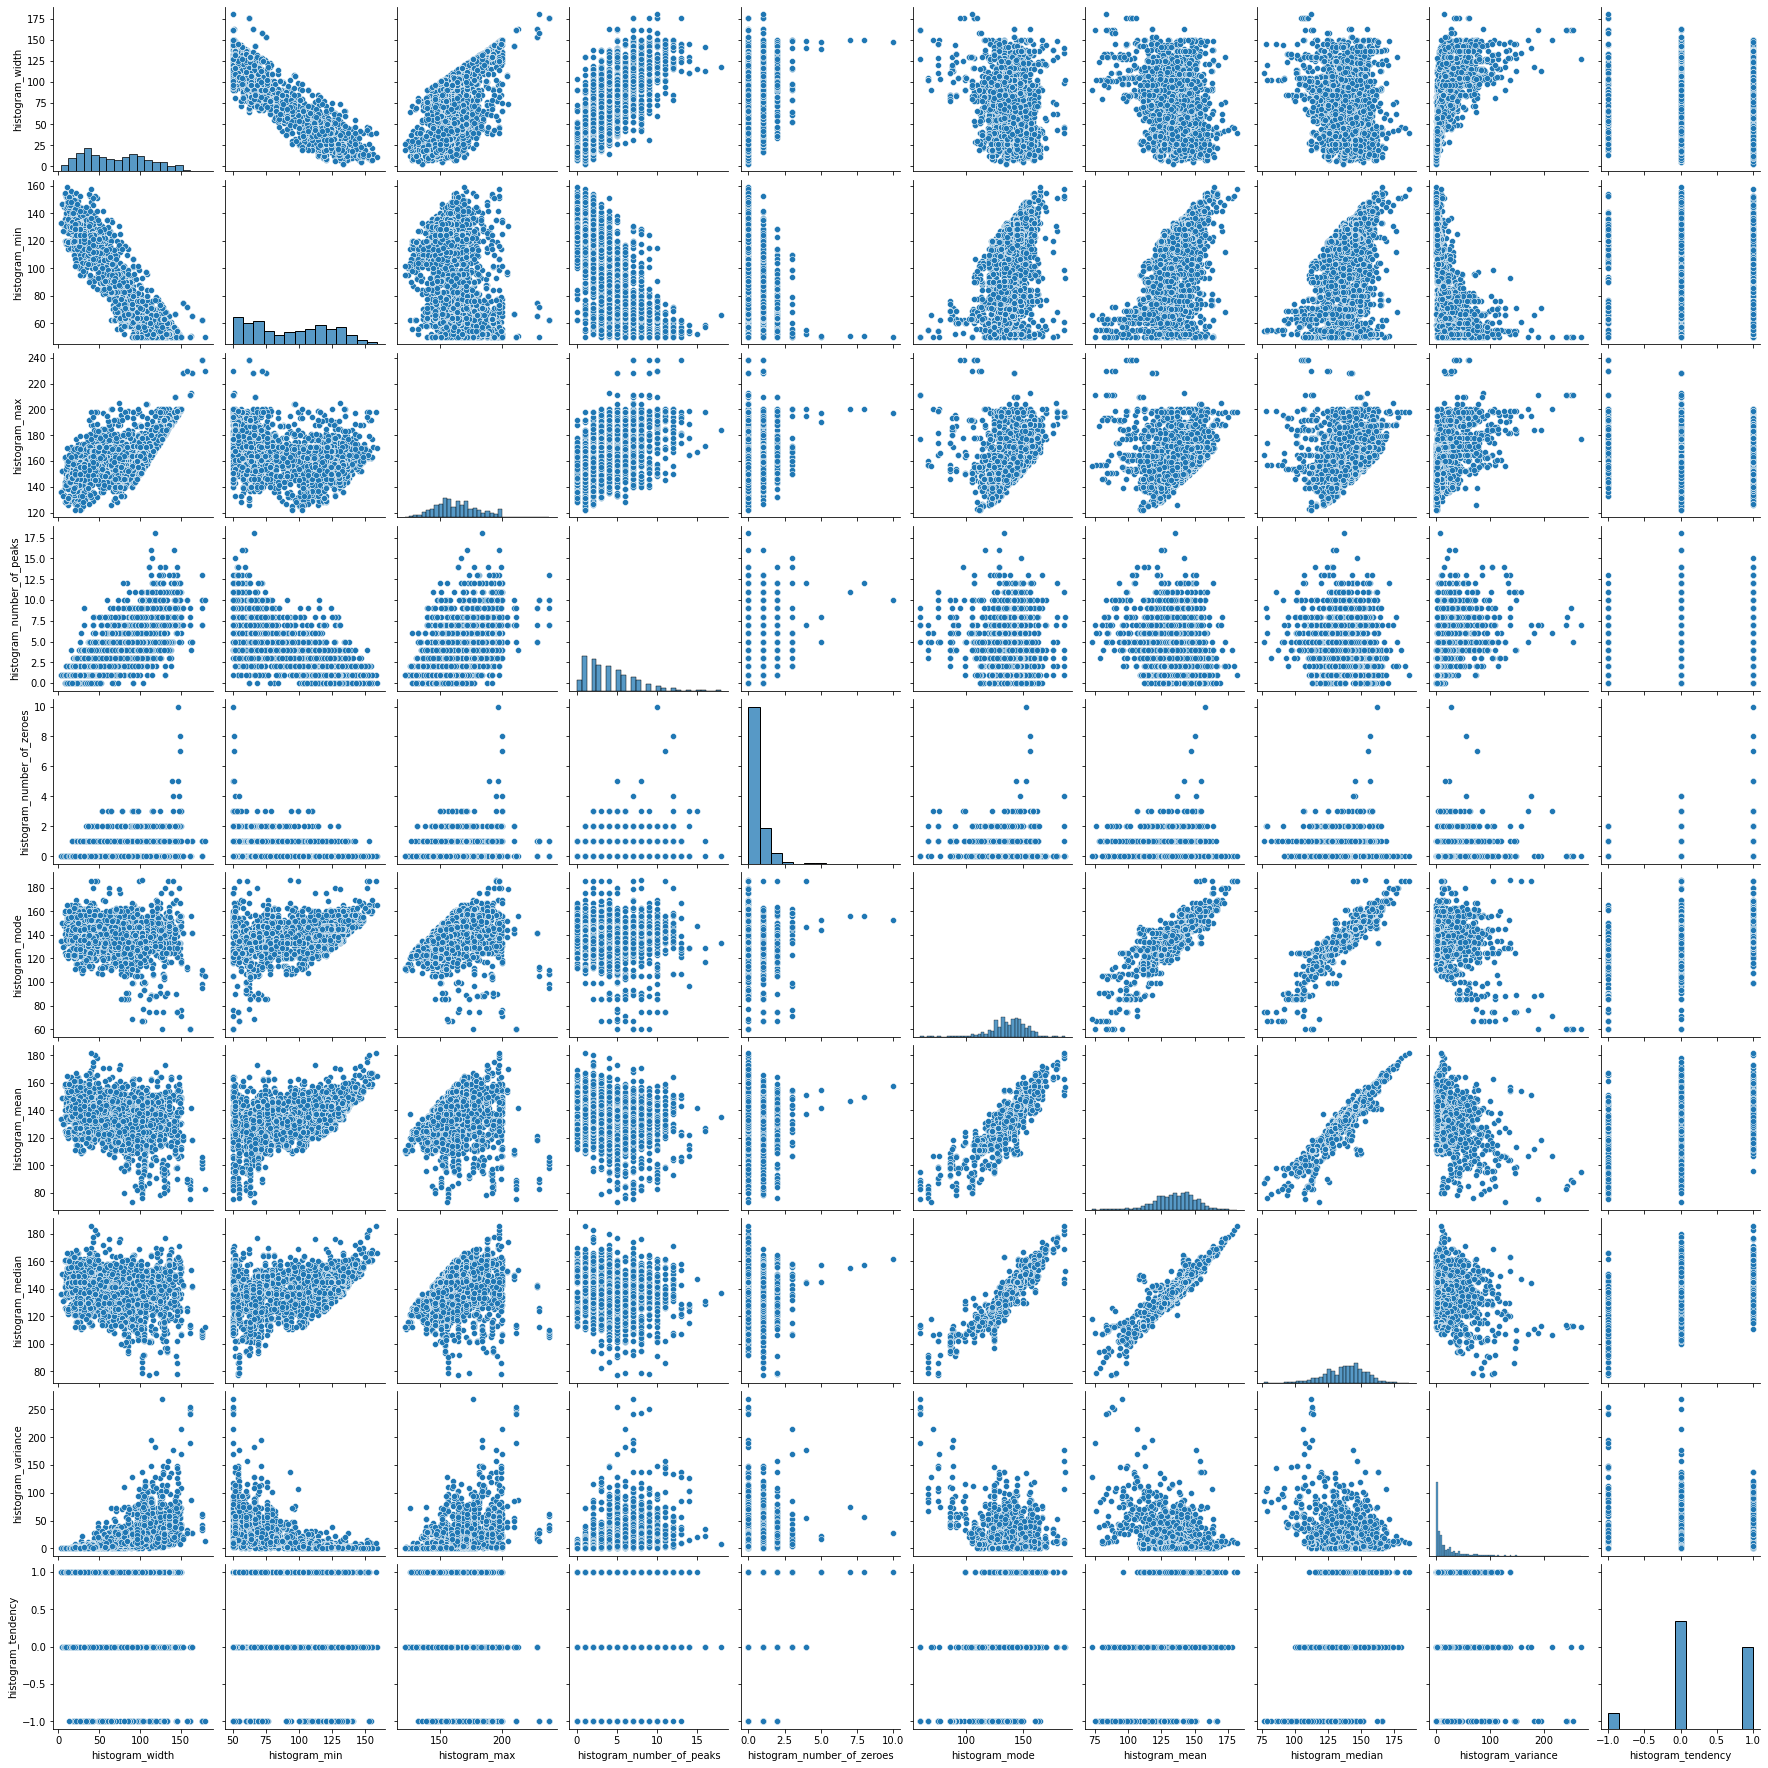

In [27]:
sns.pairplot(data = df[['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]);

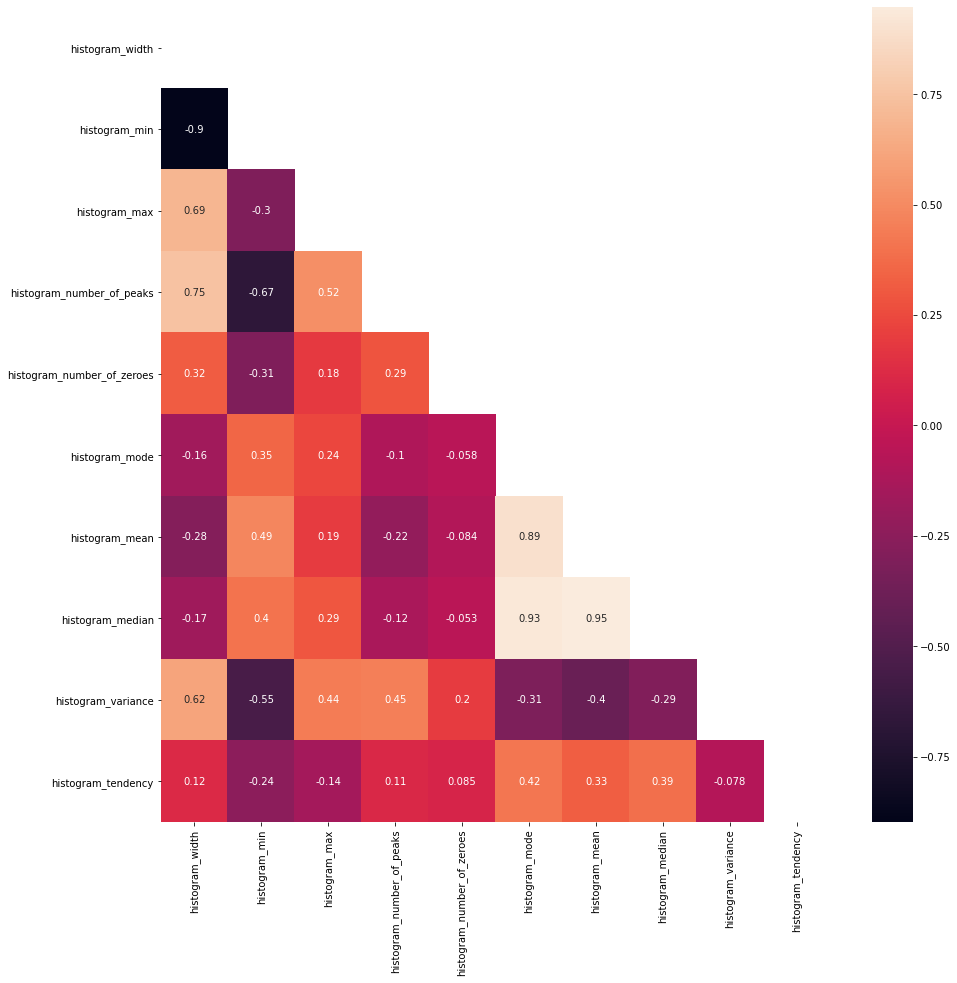

In [29]:
mask = np.zeros_like(df[['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']].corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,15))
sns.heatmap(df[['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']].corr(), annot=True, mask=mask);

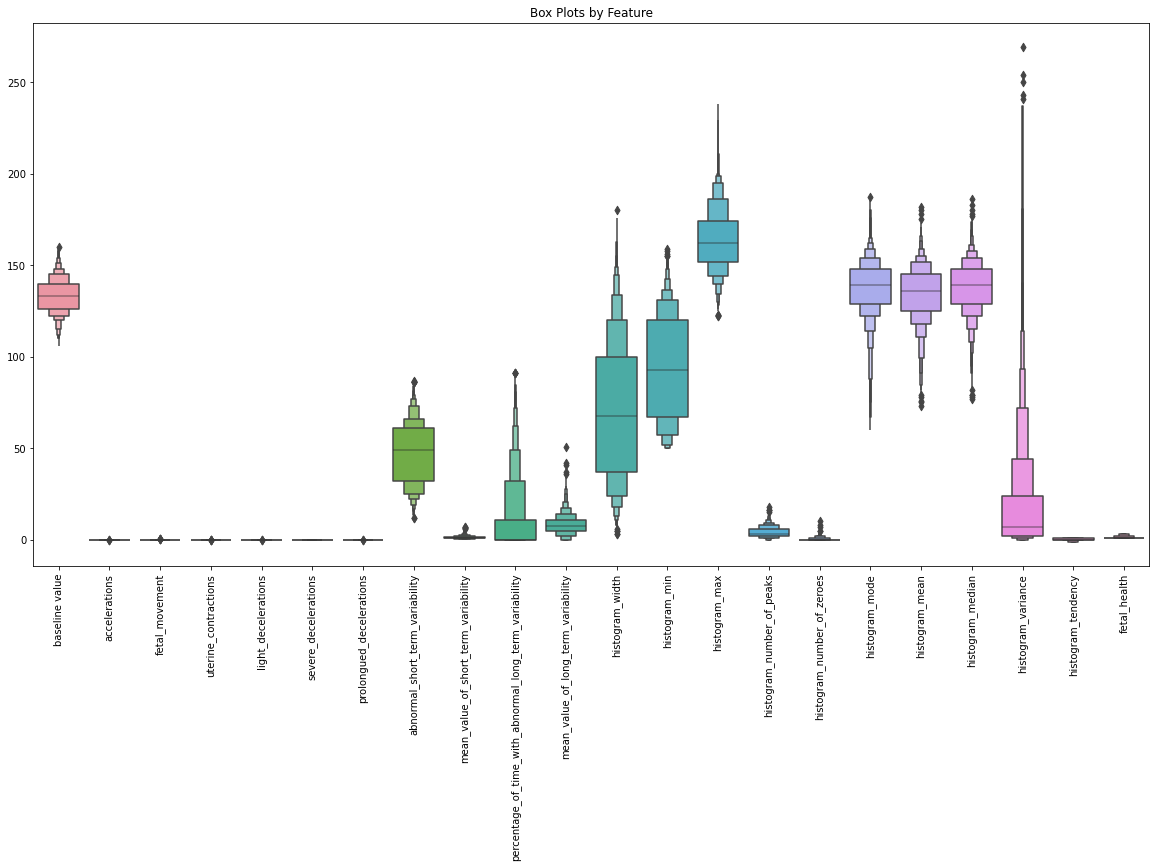

In [94]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = df)
plt.xticks(rotation=90);
plt.title('Box Plots by Feature');

### Model Testing ###

In [63]:
X = df.drop(columns=['fetal_health'])

y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1, stratify = y )

In [64]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [65]:
def pipe(model):
    #instantiate model
    model = model()
    #fit to scaled data
    model.fit(X_train_sc, y_train)
    
    #make predictions
    predictions = model.predict(X_test_sc)

    #print results
    print(f'{model} training score: {model.score(X_train_sc, y_train)}')
    print(f'{model} testing score: {model.score(X_test_sc, y_test)}')

    return

In [80]:
pipe(LogisticRegression)

LogisticRegression() training score: 0.8977415307402761
LogisticRegression() testing score: 0.9078947368421053


In [68]:
pipe(DecisionTreeClassifier)

DecisionTreeClassifier() training score: 0.998745294855709
DecisionTreeClassifier() testing score: 0.9116541353383458


In [70]:
pipe(KNeighborsClassifier)

KNeighborsClassifier() training score: 0.9316185696361355
KNeighborsClassifier() testing score: 0.8984962406015038


In [72]:
pipe(RandomForestClassifier)

RandomForestClassifier() training score: 0.998745294855709
RandomForestClassifier() testing score: 0.9454887218045113


In [74]:
pipe(AdaBoostClassifier)

AdaBoostClassifier() training score: 0.9084065244667503
AdaBoostClassifier() testing score: 0.8853383458646616


In [75]:
pipe(SVC)

SVC() training score: 0.9240903387703889
SVC() testing score: 0.9191729323308271


In [89]:
pipe(GradientBoostingClassifier)

GradientBoostingClassifier() training score: 0.9949811794228356
GradientBoostingClassifier() testing score: 0.9492481203007519


In [90]:
pipe(ExtraTreesClassifier)

ExtraTreesClassifier() training score: 0.998745294855709
ExtraTreesClassifier() testing score: 0.9342105263157895


In [91]:
pipe(XGBClassifier)

C:\Users\rgf60\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) training score: 0.998745294855709
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              col

**Models we will explore further:**

Extra Trees - Julia

SVC - Katie

Gradient Boost - Rachael

Random Forest - Afsara